# Multiple ROC-AUC in one plot

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sn
from numpy import std
from numpy import mean
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc, plot_roc_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline

## Loading Different Sets

In [2]:
# All 45
%cd Z:\PPMI_Data\Excels\NonMotors\The251\Male
df1 = pd.read_csv('Feats45_CategAge_APPRDX_Male_Edit.csv')
df1 = df1.drop(['PATNO'], axis=1)
df1['APPRDX'] = df1['APPRDX'] -1
print(df1.shape)
df1.head(2)

Z:\PPMI_Data\Excels\NonMotors\The251\Male
(167, 46)


,APPRDX,Benton,Clock,COGSTATE,Epworth,Geriatric_Depression,Hopkins_Recall,Hopkins_Recog,LetterNumber,Lexical_Fluency,...,SCOPA_Sex,Semantic,Education,Hand,STAIS,STAIA,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,0,0,1,0,0,1,0,0,1,1,...,0,2,1,0,0,0,1,0,0,2
1,0,0,0,0,1,0,0,0,1,2,...,0,2,1,0,0,0,1,1,1,0


In [3]:
# Decision Tree
df2 = pd.read_csv('DecTree_All45Feats_Data_Male.csv')
#df2 = df2.drop(['PATNO'], axis=1)
df2['APPRDX'] = df2['APPRDX'] -1
print(df2.shape)
df2.head(2)

(167, 6)


,APPRDX,UPSIT,Symbol_Digit,Trail_Making_B,MDSP_Fatigue,MDS_Apathy
0,0,2,1,0,1,1
1,0,0,1,1,0,0


In [4]:
# Random Forest
df3 = pd.read_csv('RanFor_All45Feats_Data_Male.csv')
#df3 = df3.drop(['PATNO'], axis=1)
df3['APPRDX'] = df3['APPRDX'] -1
print(df3.shape)
df3.head(2)

(167, 11)


,APPRDX,UPSIT,Symbol_Digit,MDSP_Fatigue,Trail_Making_B,REM_Dream,MDSP_Pain,Geriatric_Depression,SCOPA_Sex,MDSP_SleepDay,MDSP_SleepNight
0,0,2,1,1,0,2,1,1,0,1,2
1,0,0,1,0,1,0,0,0,0,1,0


In [5]:
# Boruta
df4 = pd.read_csv('BorutaR_All45Feats_Data_Male.csv')
df4 = df4.drop(['PATNO'], axis=1)
df4['APPRDX'] = df4['APPRDX'] -1
print(df4.shape)
df4.head(2)

(167, 13)


,APPRDX,Hopkins_Recog,LetterNumber,MDSP_Fatigue,MDS_Depress,MDS_Apathy,Modif_Boston,Montreal_Cognitive,REM_Dream,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,0,0,1,1,0,1,1,0,2,1,0,0,2
1,0,0,1,0,0,0,1,0,0,1,1,1,0


In [6]:
# All in 4 Methods
df5 = pd.read_csv('AllCommon_inAll45Feats_Data_Male.csv')
#df5 = df5.drop(['PATNO'], axis=1)
df5['APPRDX'] = df5['APPRDX'] -1
print(df5.shape)
df5.head(2)

(167, 19)


,APPRDX,Geriatric_Depression,Hopkins_Recog,LetterNumber,MDS_Apathy,MDS_Depress,MDSP_Fatigue,MDSP_LightHead,MDSP_Pain,MDSP_SleepDay,MDSP_SleepNight,Modif_Boston,Montreal_Cognitive,REM_Dream,SCOPA_Sex,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,0,1,0,1,1,0,1,1,1,1,2,1,0,2,0,1,0,0,2
1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0


In [7]:
# Common in any 2
df6 = pd.read_csv('Any2Common_inAll45Feats_Data_Male.csv')
df6 = df6.drop(['PATNO'], axis=1)
df6['APPRDX'] = df6['APPRDX'] -1
print(df6.shape)
df6.head(2)

(167, 12)


,APPRDX,MDS_Apathy,MDS_Depress,MDSP_Fatigue,MDSP_SleepDay,Montreal_Cognitive,REM_Dream,SCOPA_Sex,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,0,1,0,1,1,0,2,0,1,0,0,2
1,0,0,0,0,1,0,0,0,1,1,1,0


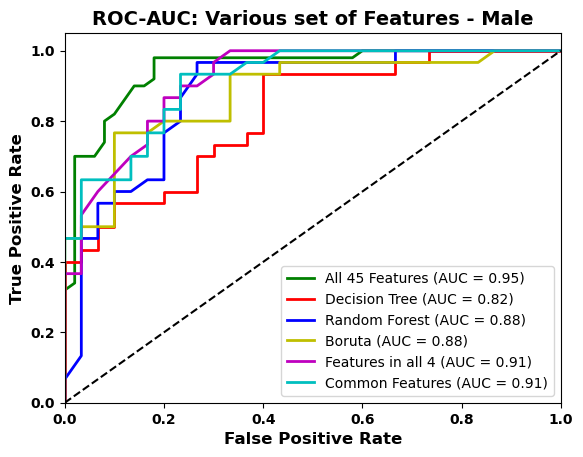

In [11]:
# First DataFrame
dataset1 = df1.groupby('APPRDX').apply(lambda x: x.sample(50, random_state=1))
X1 = dataset1.iloc[:, 1:].values
y1 = dataset1.iloc[:, 0].values
classifier1 = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob1 = cross_val_predict(classifier1, X1, y1, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr1, tpr1, thresholds1 = roc_curve(y1, y_prob1[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc1 = auc(fpr1, tpr1)

# Second DataFrame
dataset2 = df2.groupby('APPRDX').apply(lambda x: x.sample(30, random_state=1))
X2 = dataset2.iloc[:, 1:].values
y2 = dataset2.iloc[:, 0].values
classifier2 = RandomForestClassifier(n_estimators=100, criterion='gini')
y_prob2 = cross_val_predict(classifier2, X2, y2, cv=10, method='predict_proba')
fpr2, tpr2, thresholds2 = roc_curve(y2, y_prob2[:, 1], pos_label=1)
roc_auc2 = auc(fpr2, tpr2)

# Third DataFrame
dataset3 = df3.groupby('APPRDX').apply(lambda x: x.sample(30, random_state=1))
X3 = dataset3.iloc[:, 1:].values
y3 = dataset3.iloc[:, 0].values
classifier3 = RandomForestClassifier(n_estimators=100, criterion='gini')
y_prob3 = cross_val_predict(classifier3, X3, y3, cv=10, method='predict_proba')
fpr3, tpr3, thresholds3 = roc_curve(y3, y_prob3[:, 1], pos_label=1)
roc_auc3 = auc(fpr3, tpr3)

# Fourth DataFrame
dataset4 = df4.groupby('APPRDX').apply(lambda x: x.sample(30, random_state=1))
X4 = dataset4.iloc[:, 1:].values
y4 = dataset4.iloc[:, 0].values
classifier4 = RandomForestClassifier(n_estimators=100, criterion='gini')
y_prob4 = cross_val_predict(classifier4, X4, y4, cv=10, method='predict_proba')
fpr4, tpr4, thresholds4 = roc_curve(y4, y_prob4[:, 1], pos_label=1)
roc_auc4 = auc(fpr4, tpr4)

# Fifth DataFrame
dataset5 = df5.groupby('APPRDX').apply(lambda x: x.sample(30, random_state=1))
X5 = dataset5.iloc[:, 1:].values
y5 = dataset5.iloc[:, 0].values
classifier5 = RandomForestClassifier(n_estimators=100, criterion='gini')
y_prob5 = cross_val_predict(classifier5, X5, y5, cv=10, method='predict_proba')
fpr5, tpr5, thresholds5 = roc_curve(y5, y_prob5[:, 1], pos_label=1)
roc_auc5 = auc(fpr5, tpr5)

# Sixth DataFrame
dataset6 = df6.groupby('APPRDX').apply(lambda x: x.sample(30, random_state=1))
X6 = dataset6.iloc[:, 1:].values
y6 = dataset6.iloc[:, 0].values
classifier6 = RandomForestClassifier(n_estimators=100, criterion='gini')
y_prob6 = cross_val_predict(classifier6, X6, y6, cv=10, method='predict_proba')
fpr6, tpr6, thresholds6 = roc_curve(y6, y_prob6[:, 1], pos_label=1)
roc_auc6 = auc(fpr6, tpr6)


# Plot the ROC curves for all three dataframes in a single plot
plt.plot(fpr1, tpr1, color='g', lw=2, label='All 45 Features (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='r', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='b', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, color='y', lw=2, label='Boruta (AUC = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, color='m', lw=2, label='Features in all 4 (AUC = %0.2f)' % roc_auc5)
plt.plot(fpr6, tpr6, color='c', lw=2, label='Common Features (AUC = %0.2f)' % roc_auc6)
plt.plot([0, 1], [0, 1], color='k', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold', fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold', fontsize=12)
plt.title('ROC-AUC: Various set of Features - Male', fontweight='bold', fontsize=14)
plt.legend(loc="lower right")

# Save the plot as SVG and PDF files
plt.savefig('ROC_AUC_VariousFeats_Male.svg')
plt.savefig('ROC_AUC_VariousFeats_Male.pdf')

# Show the plot
plt.show()

In [10]:
# First DataFrame
tn1, fp1, fn1, tp1 = confusion_matrix(y1, np.argmax(y_prob1, axis=1)).ravel()
sensitivity1 = tp1 / (tp1 + fn1)
specificity1 = tn1 / (tn1 + fp1)
balanced_accuracy1 = (sensitivity1 + specificity1) / 2

#Second DataFrame
tn2, fp2, fn2, tp2 = confusion_matrix(y2, np.argmax(y_prob2, axis=1)).ravel()
sensitivity2 = tp2 / (tp2 + fn2)
specificity2 = tn2 / (tn2 + fp2)
balanced_accuracy2 = (sensitivity2 + specificity2) / 2

#Third DataFrame
tn3, fp3, fn3, tp3 = confusion_matrix(y3, np.argmax(y_prob3, axis=1)).ravel()
sensitivity3 = tp3 / (tp3 + fn3)
specificity3 = tn3 / (tn3 + fp3)
balanced_accuracy3 = (sensitivity3 + specificity3) / 2

#Fourth DataFrame
tn4, fp4, fn4, tp4 = confusion_matrix(y4, np.argmax(y_prob4, axis=1)).ravel()
sensitivity4 = tp4 / (tp4 + fn4)
specificity4 = tn4 / (tn4 + fp4)
balanced_accuracy4 = (sensitivity4 + specificity4) / 2

#Fifth DataFrame
tn5, fp5, fn5, tp5 = confusion_matrix(y5, np.argmax(y_prob5, axis=1)).ravel()
sensitivity5 = tp5 / (tp5 + fn5)
specificity5 = tn5 / (tn5 + fp5)
balanced_accuracy5 = (sensitivity5 + specificity5) / 2

#Sixth DataFrame
tn6, fp6, fn6, tp6 = confusion_matrix(y6, np.argmax(y_prob6, axis=1)).ravel()
sensitivity6 = tp6 / (tp6 + fn6)
specificity6 = tn6 / (tn6 + fp6)
balanced_accuracy6 = (sensitivity6 + specificity6) / 2

data = {
    'All_45_Features': [sensitivity1, specificity1, balanced_accuracy1],
    'Decision_Tree': [sensitivity2, specificity2, balanced_accuracy2],
    'Random_Forest': [sensitivity3, specificity3, balanced_accuracy3],
    'Boruta': [sensitivity4, specificity4, balanced_accuracy4],
    'Features_inAll4': [sensitivity5, specificity5, balanced_accuracy5],
    'Common_Features': [sensitivity6, specificity6, balanced_accuracy6]
}
results_df = pd.DataFrame(data, index=['Sensitivity', 'Specificity', 'Balanced Accuracy'])

results_df.to_csv('Table_VariousSetOfFeats_Male.csv')
results_df.head()

,All_45_Features,Decision_Tree,Random_Forest,Boruta,Features_inAll4,Common_Features
Sensitivity,0.84,0.666667,0.733333,0.733333,0.800000,0.8
Specificity,0.88,0.700000,0.766667,0.833333,0.866667,0.8
Balanced Accuracy,0.86,0.683333,0.750000,0.783333,0.833333,0.8
